# Analysis of Top Indian Instagram Influencers


## Introduction

The goal of this project is to analyze a dataset of the top 100 Instagram influencers in India. The analysis aims to uncover key trends related to follower counts, engagement rates, and the most popular topics of influence. The key questions this project seeks to answer are:

* Who are the dominant influencers in the Indian market?

* What does the distribution of followers and engagement look like?

* Which influencer categories are most common and which drive the highest engagement?

* Is there a relationship between an influencer's follower count and their engagement rate?

## 1. Data Cleaning and Preparation

In [522]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [523]:
df=pd.read_csv("instagram_data_india.csv")

* Data Type updation according to the data

In [524]:
df['COUNTRY'] = df['COUNTRY'].astype('category')


- Cleaning the engagement rate column by removing the '%' symbol and converting it to a float.

In [525]:
df['ER'] = df['ER'].str.replace('%', '').astype(float)


- Converting follower counts and potential reach from string formats (e.g., '267.1M') into numerical values.

In [526]:

def convert_to_number(value):
    if isinstance(value, str) and 'M' in value.upper():
        return float(value.upper().replace('M', '')) * 1_000_000
    else:
        return float(value)

# Apply the function to the 'followers' and 'potential reach' columns
df['FOLLOWERS'] = df['FOLLOWERS'].apply(convert_to_number).astype(int)
df['POTENTIAL REACH'] = df['POTENTIAL REACH'].apply(convert_to_number).astype(int)

- Renaming the columns for easier access.

In [527]:
df=df.rename(columns={'#':'Sno','NAME':'Name','FOLLOWERS':'Followers','ER':'ER(in %)','POTENTIAL REACH':'Potential Reach','COUNTRY':'Country','TOPIC OF INFLUENCE':'Topic of influence'})
df


,Sno,Name,Followers,ER(in %),Country,Topic of influence,Potential Reach
0,1,Virat Kohli @virat.kohli,267100000,0.02,India,Sports Cricket Athlete,80100000
1,2,Narendra Modi @narendramodi,87300000,2.23,India,Politics,26200000
2,3,Alia Bhatt 💛 @aliaabhatt,83700000,0.02,India,Acting and Drama Celebrity Actors Actor,25100000
3,4,Katrina Kaif @katrinakaif,79700000,0.87,India,Beauty and Self Care Celebrity Actors Actor,23900000
4,5,दीपिका पादुकोण @deepikapadukone,78900000,2.18,India,Entertainment and Music Actors,23700000
...,...,...,...,...,...,...,...
95,96,Raghav Juyal @raghavjuyal,11400000,3.34,India,Entertainment and Music Home and Garden Music ...,3400000
96,97,Siddharth Nigam @thesiddharthnigam,11300000,0.87,India,Entertainment and Music Sports Celebrity,3400000
97,98,MC STΔN 💔 @m___c___stan,11100000,13.19,India,Entertainment and Music Fashion and Accessories,3300000
98,99,Sahil Khan @sahilkhan,11000000,1.15,India,Fitness and Health Product Education Gym Coaching,3300000


- Separating the influencer's name from their Instagram handle into distinct Name and Insta columns for easier analysis.

In [528]:
import re

def separate_name_and_handle(text):
    # Regex to find the first '@' and everything after it
    match = re.search(r'(@\S+)', text)
    if match:
        handle = match.group(1)
        name = text.replace(handle, '').strip()
        # Remove any leading/trailing emojis or special characters from the name
        name = re.sub(r'[^\w\s]', '', name).strip()
        return name, handle
    else:
         return text.strip(), None
    
df[['Name', 'Insta']] = df['Name'].apply(
    lambda x: pd.Series(separate_name_and_handle(x))
)
df.head(10)



,Sno,Name,Followers,ER(in %),Country,Topic of influence,Potential Reach,Insta
0,1,Virat Kohli,267100000,0.02,India,Sports Cricket Athlete,80100000,@virat.kohli
1,2,Narendra Modi,87300000,2.23,India,Politics,26200000,@narendramodi
2,3,Alia Bhatt,83700000,0.02,India,Acting and Drama Celebrity Actors Actor,25100000,@aliaabhatt
3,4,Katrina Kaif,79700000,0.87,India,Beauty and Self Care Celebrity Actors Actor,23900000,@katrinakaif
4,5,दपक पदकण,78900000,2.18,India,Entertainment and Music Actors,23700000,@deepikapadukone
5,6,Neha Kakkar,77700000,0.77,India,Entertainment and Music Singer Musician,23300000,@nehakakkar
6,7,Salman Khan,69200000,1.59,India,Entertainment and Music Celebrity Actor,20800000,@beingsalmankhan
7,8,Akshay Kumar,68300000,0.02,India,Entertainment and Music Celebrity Actors Actor,20500000,@akshaykumar
8,9,disha patani paatni,61000000,0.61,India,Celebrity Actors,18300000,@dishapatani
9,10,Sunny Leone,55300000,0.27,India,Beauty and Self Care Modeling Actors Actor,16600000,@sunnyleone


- Manually correcting inconsistencies in names to ensure data accuracy.

In [529]:
# Change the value where the 'Name' column equals 'हिन्दी नाम'
df.loc[df['Name'] == 'दपक पदकण', 'Name'] = 'Deepika Padukone'
df.loc[df['Name'] == 'disha patani paatni', 'Name'] = 'Disha Patani'

## 2.  Exploratory Data Analysis (EDA)

In [530]:
import matplotlib.ticker as mtick

### Top 10 Influencers by Follower Count
- The analysis begins by identifying the most-followed individuals. The bar chart clearly shows that Virat Kohli is the dominant influencer in this dataset with over 267 million followers, significantly more than the second most-followed, Prime Minister Narendra Modi. The top of the list is heavily populated by celebrities from sports and entertainment.

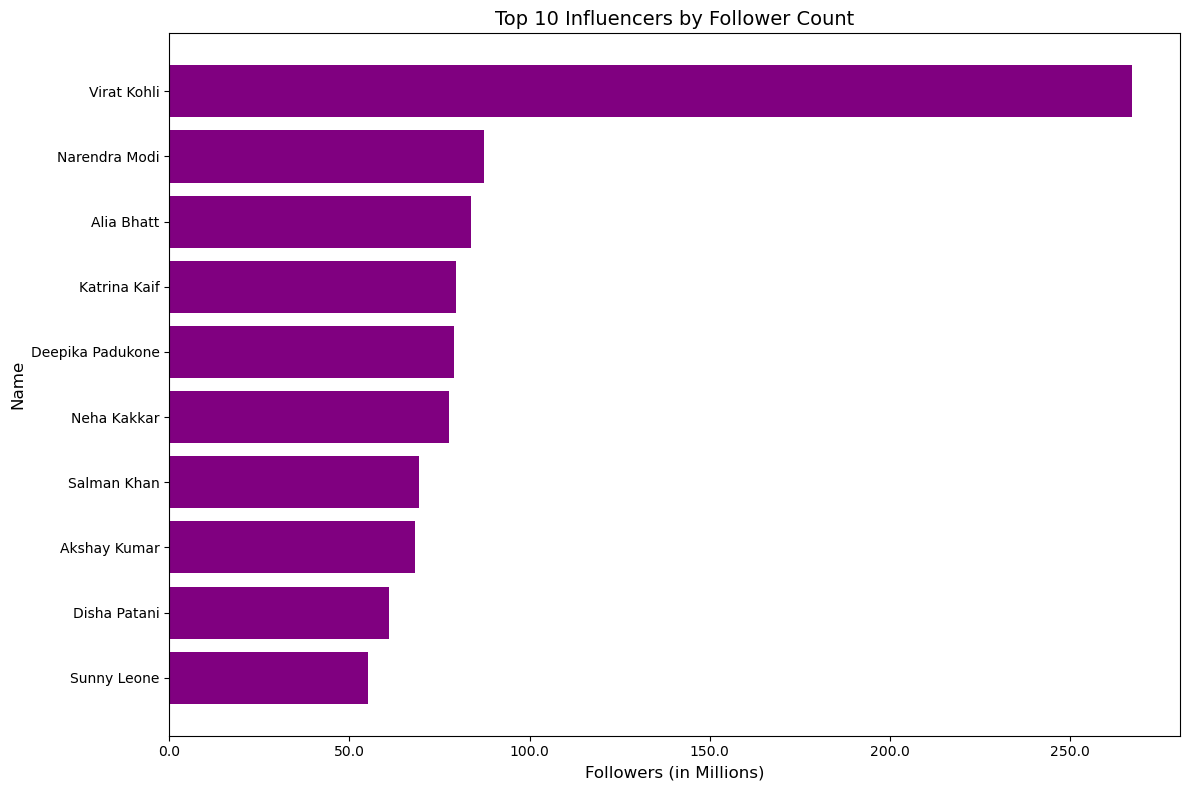

In [531]:
top_10_df = df.sort_values(by='Followers', ascending=True).tail(10)
plt.figure(figsize=(12, 8))
plt.barh(top_10_df['Name'], top_10_df['Followers'], color='purple')
plt.xlabel('Followers (in Millions)', fontsize=12)
plt.ylabel('Name', fontsize=12)
plt.title('Top 10 Influencers by Follower Count', fontsize=14)
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{int(x)/1000000}'))
plt.tight_layout()
plt.show()

### Distribution of Followers
- The histogram of follower distribution reveals a right-skewed distribution. This indicates that the majority of influencers in this list have follower counts in the lower range (10-50 million), while a few mega-influencers act as significant outliers at the higher end.

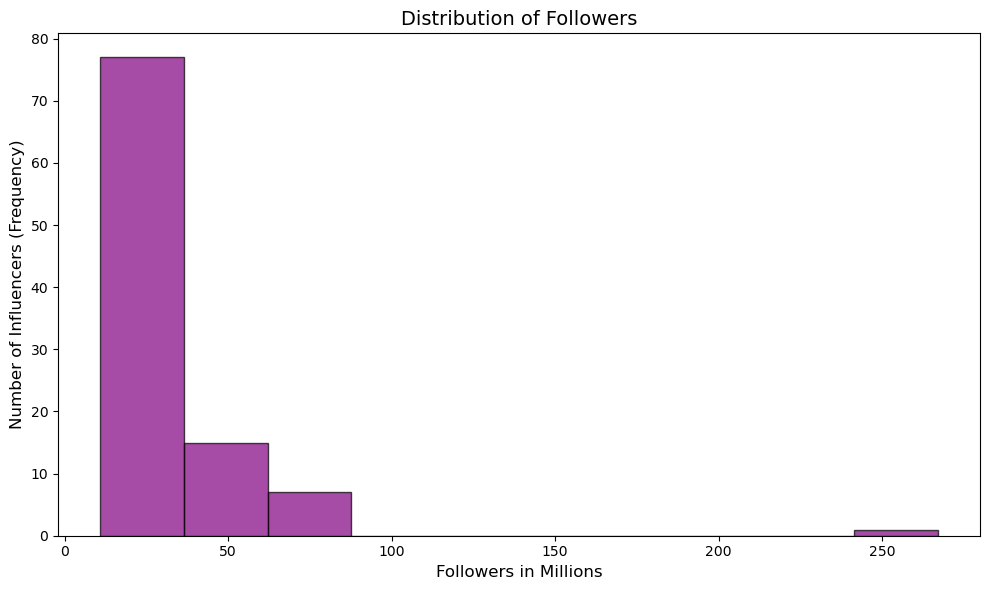

In [532]:
df['Followers_M']=df['Followers']/1_000_000
plt.figure(figsize=(10, 6))
plt.hist(df['Followers_M'],bins=10,edgecolor='black',color='purple',alpha=0.7)
plt.xlabel('Followers in Millions', fontsize=12)
plt.ylabel('Number of Influencers (Frequency)', fontsize=12)
plt.title('Distribution of Followers', fontsize=14)
plt.tight_layout()

In [533]:
df.head()

,Sno,Name,Followers,ER(in %),Country,Topic of influence,Potential Reach,Insta,Followers_M
0,1,Virat Kohli,267100000,0.02,India,Sports Cricket Athlete,80100000,@virat.kohli,267.1
1,2,Narendra Modi,87300000,2.23,India,Politics,26200000,@narendramodi,87.3
2,3,Alia Bhatt,83700000,0.02,India,Acting and Drama Celebrity Actors Actor,25100000,@aliaabhatt,83.7
3,4,Katrina Kaif,79700000,0.87,India,Beauty and Self Care Celebrity Actors Actor,23900000,@katrinakaif,79.7
4,5,Deepika Padukone,78900000,2.18,India,Entertainment and Music Actors,23700000,@deepikapadukone,78.9


Followers vs. Engagement Rate



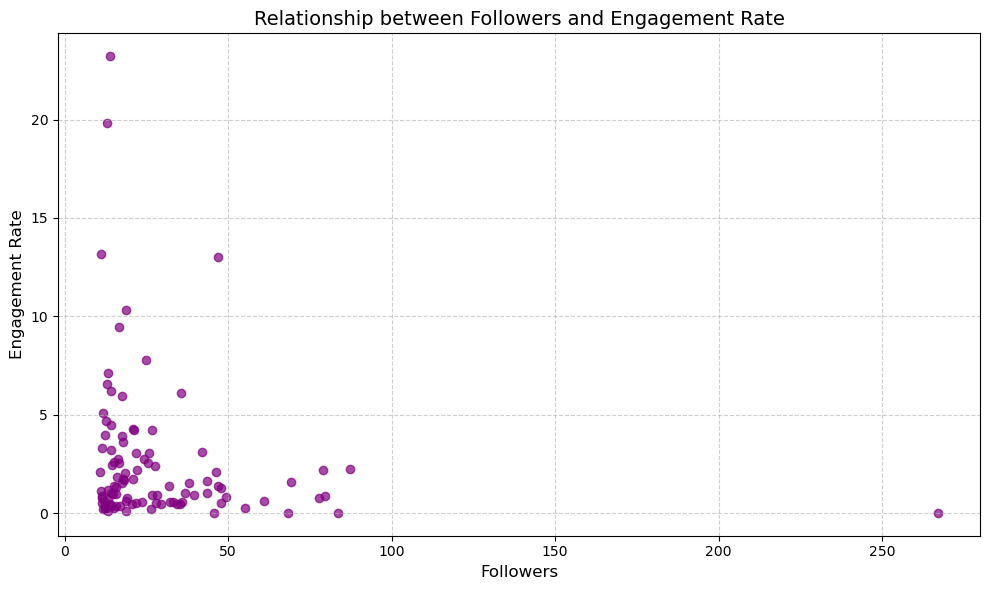

In [534]:
plt.figure(figsize=(10, 6))

plt.scatter(df['Followers_M'],df['ER(in %)'], color='purple', alpha=0.7)
plt.xlabel('Followers', fontsize=12)
plt.ylabel('Engagement Rate', fontsize=12)
plt.title('Relationship between Followers and Engagement Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

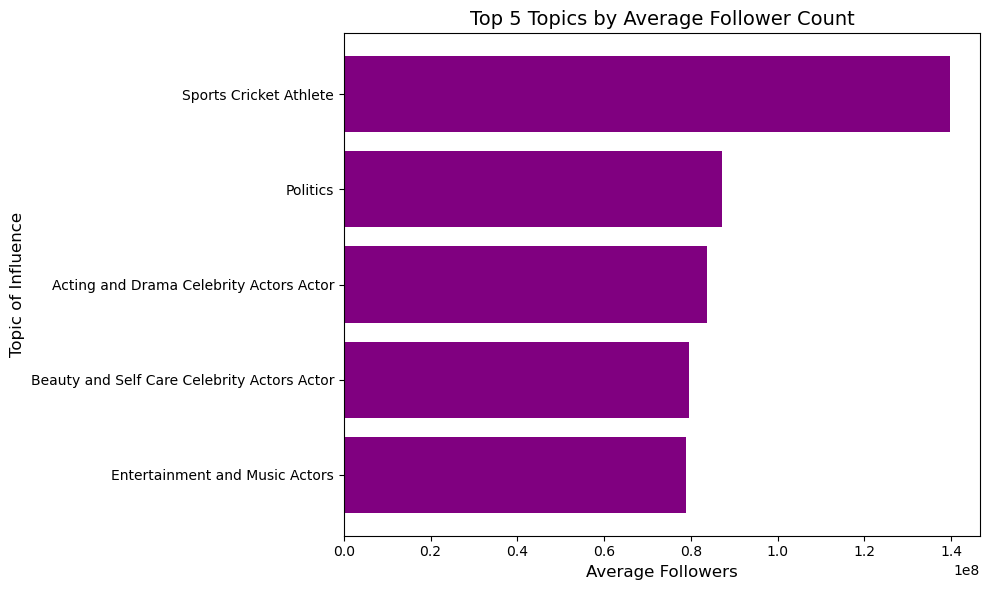

In [535]:
average_followers_by_topic = df.groupby('Topic of influence')['Followers'].mean()
top_5_topics = average_followers_by_topic.sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_5_topics.index, top_5_topics.values, color='purple')
plt.gca().invert_yaxis()
plt.xlabel('Average Followers', fontsize=12)
plt.ylabel('Topic of Influence', fontsize=12)
plt.title('Top 5 Topics by Average Follower Count', fontsize=14)
plt.tight_layout()



                 Followers  ER(in %)  Potential Reach
Followers         1.000000 -0.171546         0.999994
ER(in %)         -0.171546  1.000000        -0.171998
Potential Reach   0.999994 -0.171998         1.000000


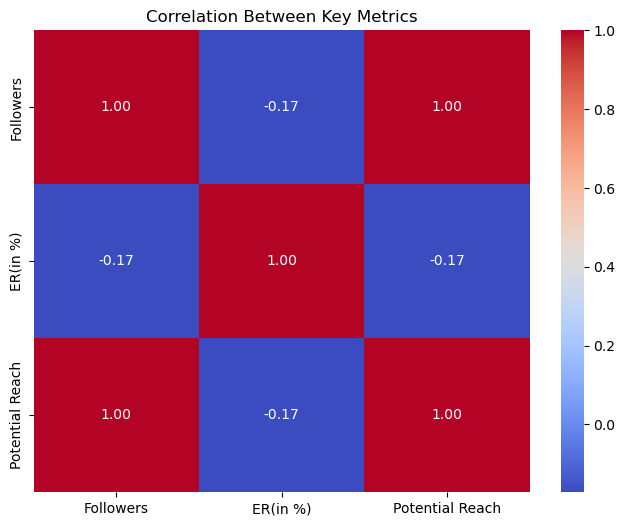

In [542]:
import seaborn as sns
columns_to_analyze = df[['Followers', 'ER(in %)', 'Potential Reach']]

correlation_matrix=columns_to_analyze.corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Key Metrics')
plt.show()


- A key investigation in this project was to understand the relationship between follower count and engagement rate (ER). The scatter plot and correlation heatmap reveal a notable negative correlation (-0.17). As an influencer's follower count increases, their engagement rate tends to decrease. This is a critical insight, suggesting that a larger audience does not necessarily mean a more engaged one.

Engagement Rate by Influencer Tier


C:\Users\DIVYA K BANJARE\AppData\Local\Temp\ipykernel_36532\2254337960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_er_by_topic.values, y=avg_er_by_topic.index, palette='plasma')


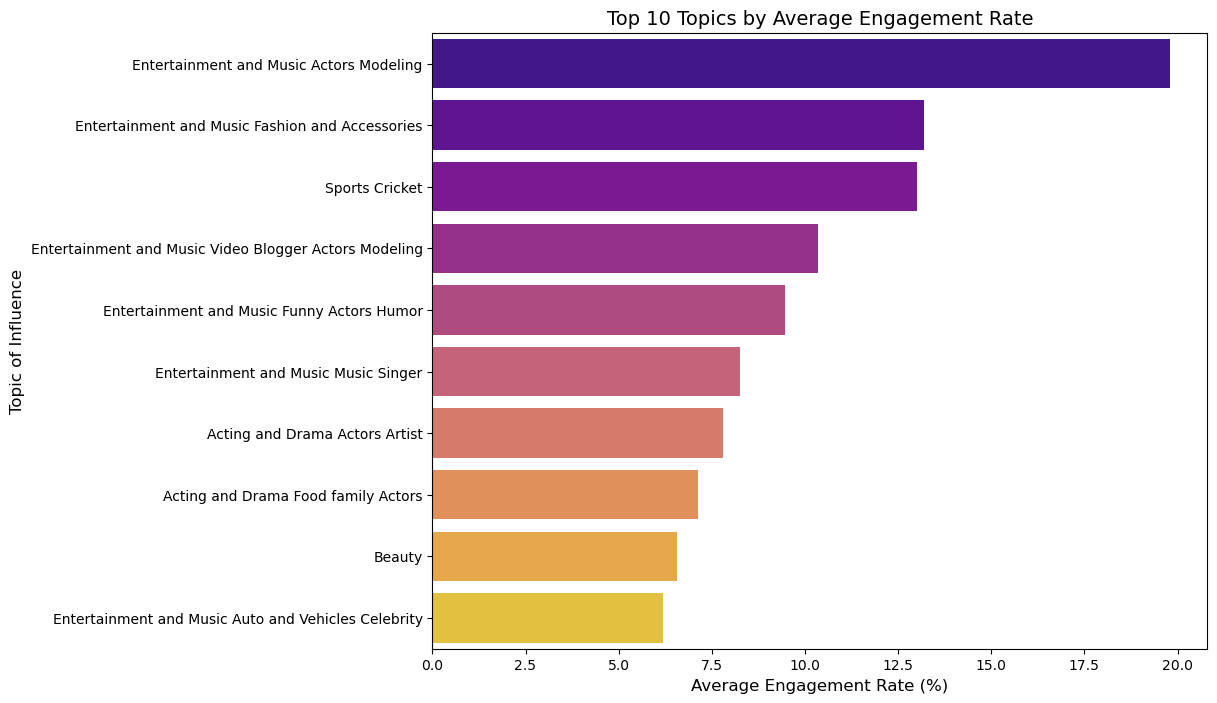

In [537]:
# Bar Chart of Average ER by Topic
avg_er_by_topic = df.groupby('Topic of influence')['ER(in %)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 8))
sns.barplot(x=avg_er_by_topic.values, y=avg_er_by_topic.index, palette='plasma')
plt.title('Top 10 Topics by Average Engagement Rate', fontsize=14)
plt.xlabel('Average Engagement Rate (%)', fontsize=12)
plt.ylabel('Topic of Influence', fontsize=12)
plt.show()

C:\Users\DIVYA K BANJARE\AppData\Local\Temp\ipykernel_36532\4243838564.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ER(in %)', y='Topic of influence', data=df_top_topics, palette='viridis', order=top_10_topics)


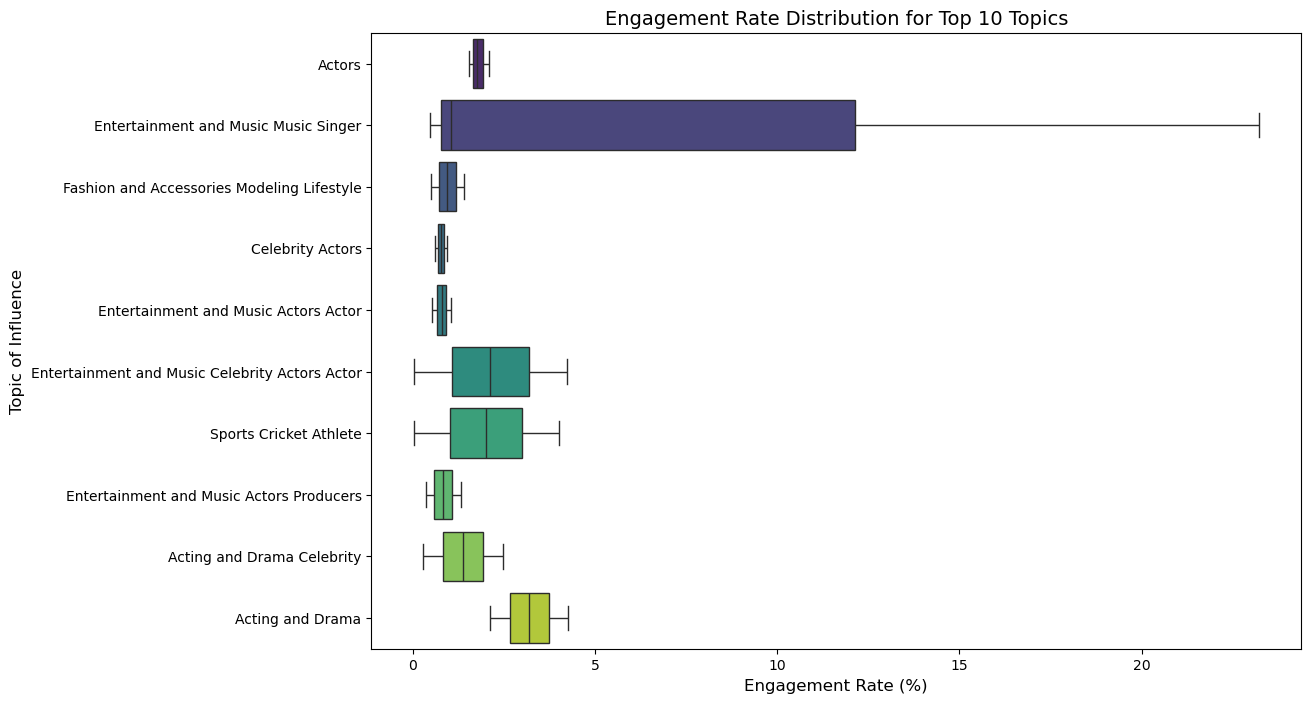

In [538]:
# Box Plot of ER Distribution for Top 10 Topics
top_10_topics = df['Topic of influence'].value_counts().head(10).index
df_top_topics = df[df['Topic of influence'].isin(top_10_topics)]
plt.figure(figsize=(12, 8))
sns.boxplot(x='ER(in %)', y='Topic of influence', data=df_top_topics, palette='viridis', order=top_10_topics)
plt.title('Engagement Rate Distribution for Top 10 Topics', fontsize=14)
plt.xlabel('Engagement Rate (%)', fontsize=12)
plt.ylabel('Topic of Influence', fontsize=12)
plt.show()

C:\Users\DIVYA K BANJARE\AppData\Local\Temp\ipykernel_36532\2376212818.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_er_by_tier.index, y=avg_er_by_tier.values, palette='magma', order=['Micro-influencer', 'Macro-influencer', 'Mega-influencer'])


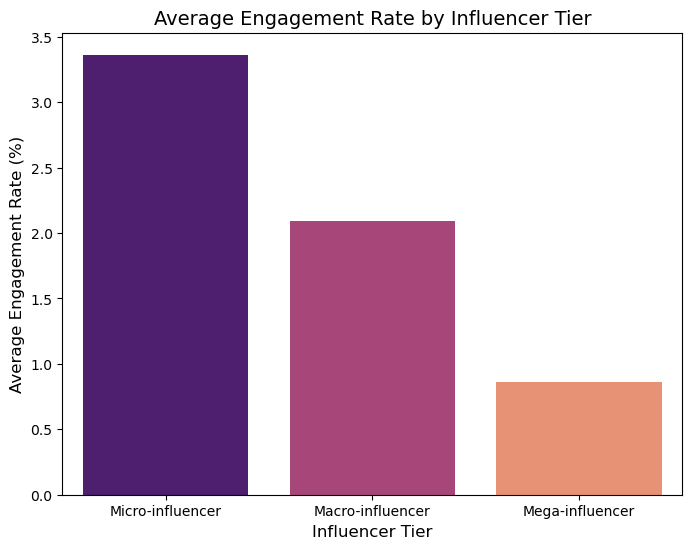

In [539]:
# Create the tier function
def create_tier(followers):
    if followers >= 50_000_000:
        return 'Mega-influencer'
    elif 20_000_000 <= followers < 50_000_000:
        return 'Macro-influencer'
    else:
        return 'Micro-influencer'

# Apply it to create the new column
df['Tier'] = df['Followers'].apply(create_tier)

# Calculate and plot the average ER by the new tier
avg_er_by_tier = df.groupby('Tier')['ER(in %)'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_er_by_tier.index, y=avg_er_by_tier.values, palette='magma', order=['Micro-influencer', 'Macro-influencer', 'Mega-influencer'])
plt.title('Average Engagement Rate by Influencer Tier', fontsize=14)
plt.xlabel('Influencer Tier', fontsize=12)
plt.ylabel('Average Engagement Rate (%)', fontsize=12)
plt.show()

- To explore the relationship between follower count and engagement further, influencers were categorized into tiers. The analysis confirms the trend seen in the scatter plot:This analysis confirms a key industry trend: as follower count grows, engagement rate declines. Mega-influencers, despite their massive reach, have the lowest average engagement. Conversely, Micro-influencers command the most engaged audiences, making them highly effective for campaigns focused on user interaction.

In [540]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


### Topic Analysis
- An analysis of the 'Topic of Influence' shows that 'Entertainment and Music' and 'Acting' are the most prevalent categories, making up a significant portion of the top 100 list. This highlights the strong influence of the film and music industry in India's social media landscape.


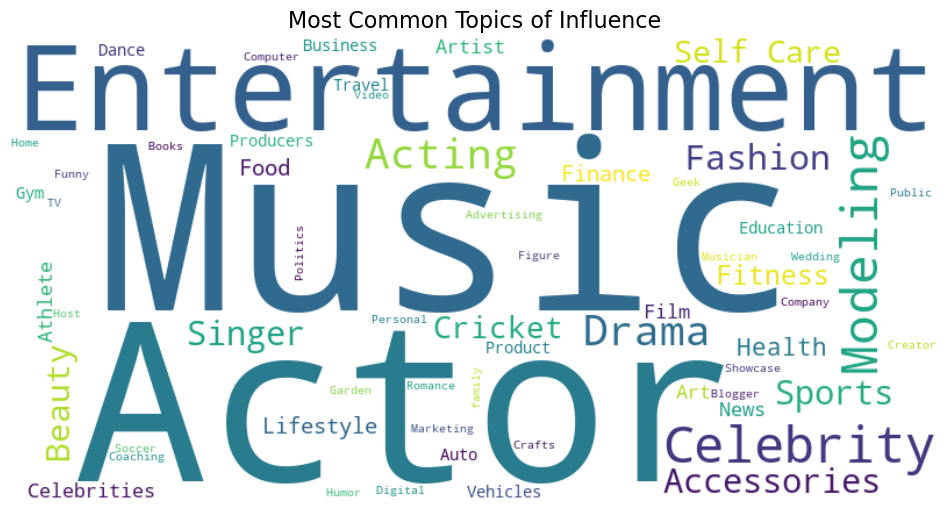

In [541]:
from wordcloud import WordCloud

# Join all topics into a single string
text = ' '.join(df['Topic of influence'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Topics of Influence', fontsize=16)
plt.show()

## 3. Conclusion & Recommendations

### This analysis of top Indian Instagram influencers provides several key takeaways:

- Popularity vs. Engagement: The most popular influencers (in terms of followers) are not the most engaging. In fact, there is a clear trend where engagement rates decrease as follower counts rise.

- Industry Dominance: The entertainment sector (actors, musicians) dominates the list of top influencers, indicating where the largest audiences are concentrated.

- Niche Power: While having fewer followers, influencers in more niche categories often command a more engaged and active community, leading to higher average engagement rates.

## 4. Recommendations:

- For a brand campaign focused on maximum brand awareness and reach, partnering with a Mega-influencer is the most effective approach.

- For campaigns where the goal is high user interaction, comments, and shares, the data suggests that a strategy involving several Micro-influencers would yield a better return on investment and a more genuinely engaged audience.